In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customers = pd.read_json("dim_customer.json") 

In [3]:
customers

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [4]:
invoices = pd.read_csv("fct_invoice.csv")
invoices["sales"]=invoices["price"]*invoices["quantity"]
invoices["invoice_date"]=pd.to_datetime(invoices["invoice_date"], format="%d/%m/%Y")

In [5]:
invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00


1. How many unique customers are in the dataset?

In [6]:
# number of customers in dim_customer.json
len(customers)

5191

In [7]:
# number of unique customers in fct_invoice
len(invoices["customer_id"].unique())

5191

2. What are the different categories of products available? How many unique categories are there?



In [8]:
invoices["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [9]:
len(invoices["category"].unique())

8

3. Which payment method is the most popular? How many times was it used?



In [10]:
invoices["payment_method"].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

1. What are the three most popular categories, by total sales?

In [11]:
invoices.groupby('category')["sales"].sum().sort_values(ascending=False).head(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

2. What are the total sales attributed to customers over the age of 45?



In [12]:
customer_invoices = pd.merge(invoices, customers, left_on="customer_id", right_on="id")

In [13]:
customer_invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera
2,I127801,644,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,1089,Rhodes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,2344,Stevens
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,172,Perkins
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,425,Pham
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,577,Williams


In [14]:
ci45 = customer_invoices[customer_invoices["age"]>45]

In [15]:
ci45

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name
2,I127801,644,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,46.0,Christopher,M,644,Stephens
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly
5,I227836,349,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,64.0,Cindy,F,349,Meyer
9,I326945,1575,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon,1200.32,67.0,Michael,M,1575,Patrick
11,I139207,195,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall,15.15,48.0,Anthony,M,195,Cowan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99440,I887161,639,Clothing,1,300.08,Cash,2021-06-22,Kanyon,300.08,80.0,Steven,M,639,Sweeney
99447,I281214,538,Toys,3,107.52,Cash,2021-02-21,Metropol AVM,322.56,63.0,Elizabeth,F,538,Willis
99448,I332105,1749,Shoes,4,2400.68,Credit Card,2021-08-29,Metropol AVM,9602.72,54.0,James,M,1749,Jones
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,2344,Stevens


In [16]:
ci45["sales"].sum()

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)



In [17]:
daily_totals=invoices.groupby("invoice_date")["sales"].sum()
daily_totals

invoice_date
2021-01-01    271192.66
2021-01-02    303659.14
2021-01-03    375794.99
2021-01-04    284512.26
2021-01-05    308395.08
                ...    
2023-03-04    402423.09
2023-03-05    305423.09
2023-03-06    442091.99
2023-03-07    213393.21
2023-03-08    322808.90
Name: sales, Length: 797, dtype: float64

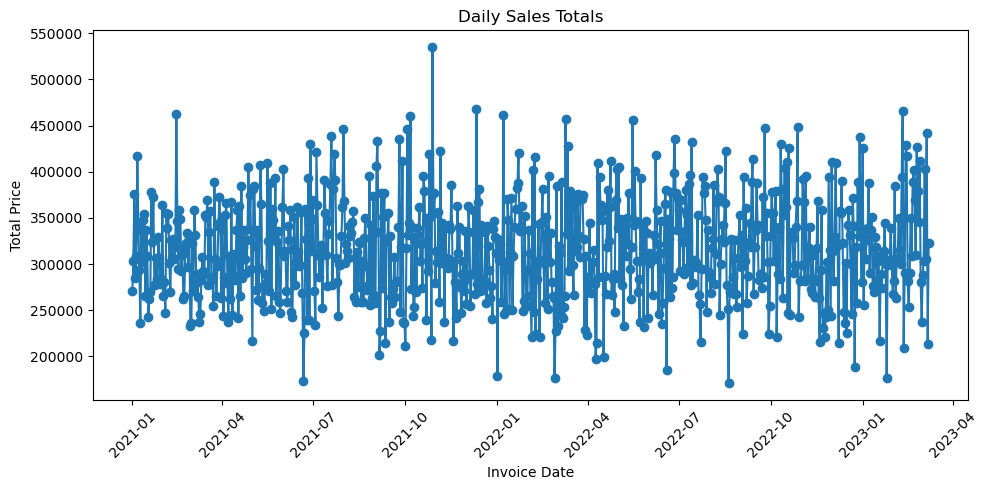

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(daily_totals.index, daily_totals.values, marker="o")
plt.xlabel("Invoice Date")
plt.ylabel("Total Price")
plt.title("Daily Sales Totals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
monthly_totals = invoices.groupby(invoices["invoice_date"].dt.to_period("M"))["sales"].sum()
monthly_totals

invoice_date
2021-01     9641614.62
2021-02     8772315.22
2021-03     9455359.38
2021-04     9389541.54
2021-05     9771756.97
2021-06     9286271.35
2021-07    10311119.68
2021-08     9630655.70
2021-09     9188165.62
2021-10    10263015.06
2021-11     9265555.29
2021-12     9585200.16
2022-01     9764311.14
2022-02     8344111.92
2022-03     9986685.16
2022-04     9326144.44
2022-05     9947574.13
2022-06     9647503.95
2022-07    10067602.95
2022-08     9651705.59
2022-09     9607629.29
2022-10    10282075.37
2022-11     8941584.66
2022-12     9869885.48
2023-01     9485599.83
2023-02     9508662.96
2023-03     2514146.79
Freq: M, Name: sales, dtype: float64

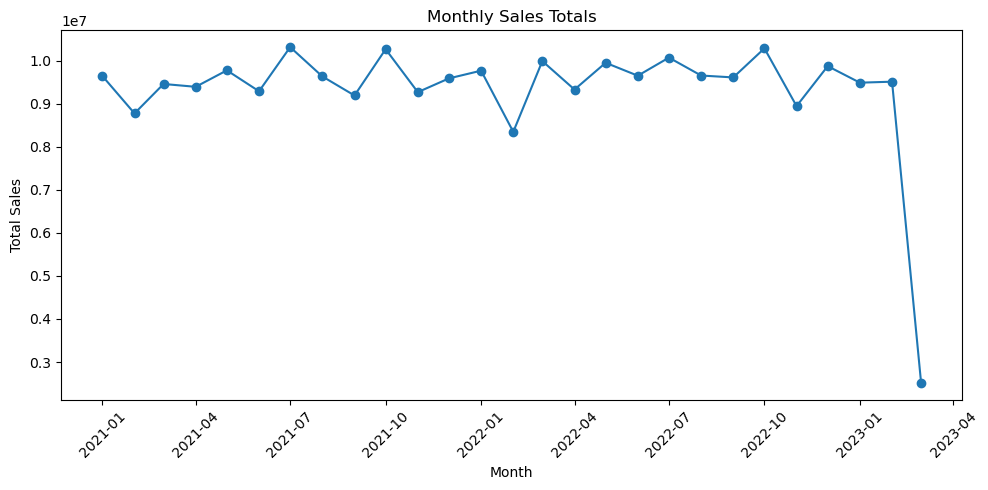

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_totals.index.to_timestamp(), monthly_totals.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Totals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

February and November are bad months, July is a good month.

In [21]:
customer_invoices["decade"]=(np.floor(customer_invoices["age"]/10))*10
customer_invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name,decade
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,NaN,William,M,229,Anderson,NaN
1,I317333,3433,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,34.0,Danielle,F,3433,Rivera,30.0
2,I127801,644,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,46.0,Christopher,M,644,Stephens,40.0
3,I173702,4900,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,46.0,Laura,F,4900,Kelly,40.0
4,I337046,1089,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,NaN,Richard,M,1089,Rhodes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,53.0,Michelle,F,2344,Stevens,50.0
99453,I325143,172,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,NaN,Lauren,F,172,Perkins,NaN
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,36.0,Mark,M,425,Pham,30.0
99455,I702964,577,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,64.0,David,M,577,Williams,60.0


In [22]:
customer_invoices.groupby(["category", "decade"])["sales"].sum()

category  decade
Books     10.0       12801.75
          20.0       79461.75
          30.0       84143.10
          40.0       87203.40
          50.0       74962.20
                      ...    
Toys      40.0      390906.88
          50.0      345067.52
          60.0      363955.20
          70.0      273244.16
          80.0      153932.80
Name: sales, Length: 64, dtype: float64